In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read the data

In [3]:
df = pd.read_csv('Project.csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Problem Statement
- The aim to build DT model which will predict customer bank me pasisa deposit karega future me ki nahi, we are building classification model

In [5]:
#checking the null-values

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
df.describe() #range of quartile se aapko outliers hai ki nai data me wo milega

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

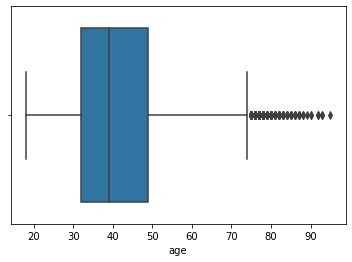

In [8]:
sns.boxplot(df['age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

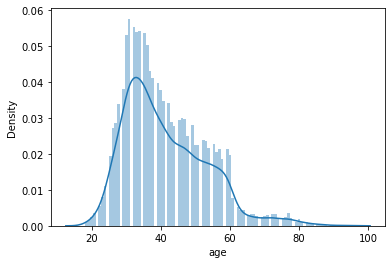

In [9]:
sns.distplot(df['age'], bins =100)

<AxesSubplot:>

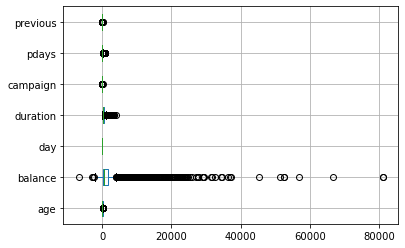

In [10]:
df.boxplot( vert = False)

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

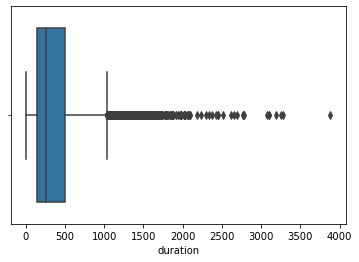

In [12]:
sns.boxplot(df['duration'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

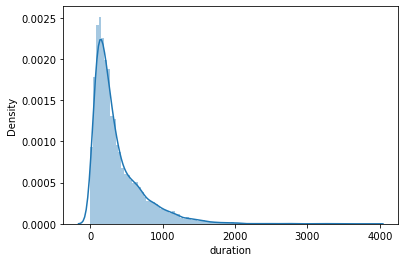

In [13]:
sns.distplot(df['duration'], bins =100)

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [15]:
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [16]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [17]:
# converting job values into criteria
df['job'] = df['job'].replace(['management', 'admin.'], 'white-collar')
df['job'] = df['job'].replace(['services', 'housemaid'], 'Pink-collar')
df['job'] = df['job'].replace(['retired', 'student', 'unemployed' ,'unknown'  ], 'Other')


In [18]:
df['job'].value_counts()

white-collar     3900
blue-collar      1944
technician       1823
Other            1565
Pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

In [19]:
df.job.value_counts()

white-collar     3900
blue-collar      1944
technician       1823
Other            1565
Pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

In [20]:
# apan logone sab customer ko contact kiya hua hai

In [21]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,white-collar,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,Pink-collar,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,white-collar,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [22]:
df.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [23]:
#combine unknown + others 

In [24]:
df['poutcome'] = df['poutcome'].replace(['other'] , 'unknown')

In [25]:
df.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [26]:
#droping contact column

In [27]:
df.drop('contact' , axis = 1, inplace = True)

In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,unknown,yes
1,56,white-collar,married,secondary,no,45,no,no,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,unknown,yes
3,55,Pink-collar,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,unknown,yes
4,54,white-collar,married,tertiary,no,184,no,no,5,may,673,2,-1,0,unknown,yes


In [29]:
df.default.value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [30]:
#encoding default ko


In [31]:
df.housing.value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

In [32]:
df.loan.value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [33]:
df['default'] = df['default'].map( { 'yes' : 1 , 'no' : 0})
df['housing'] = df['housing'].map( { 'yes' : 1 , 'no' : 0})
df['loan'] = df['loan'].map( { 'yes' : 1 , 'no' : 0})

In [34]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,0,2343,1,0,5,may,1042,1,-1,0,unknown,yes
1,56,white-collar,married,secondary,0,45,0,0,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,0,1270,1,0,5,may,1389,1,-1,0,unknown,yes
3,55,Pink-collar,married,secondary,0,2476,1,0,5,may,579,1,-1,0,unknown,yes
4,54,white-collar,married,tertiary,0,184,0,0,5,may,673,2,-1,0,unknown,yes


In [35]:
#konse day ya fir month ko mene contact kiya

In [36]:
df.drop(['month', 'day'] , axis = 1, inplace = True) #axis = 1, column ke liye rehta hai

In [37]:
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,0,2343,1,0,1042,1,-1,0,unknown,yes
1,56,white-collar,married,secondary,0,45,0,0,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,0,1270,1,0,1389,1,-1,0,unknown,yes
3,55,Pink-collar,married,secondary,0,2476,1,0,579,1,-1,0,unknown,yes
4,54,white-collar,married,tertiary,0,184,0,0,673,2,-1,0,unknown,yes


In [38]:
# Saturday - u have class, 7.30(tommorrow)
# monday - no class, 